# Introduction to computing with Legendre polynomials in Python

* [Legendre polynomials](https://mathworld.wolfram.com/LegendrePolynomial.html)
* [And more](https://en.wikipedia.org/wiki/Legendre_polynomials)
* [And more](https://www.mat.univie.ac.at/~westra/associatedlegendrefunctions.pdf)

In [ ]:
#| default_exp garcia-theoretical-chemistry

In [ ]:
import numpy as np
import scipy
from scipy.special import roots_legendre, eval_legendre
import matplotlib.pyplot as plt
import math

# following example from
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_legendre.html

Evaluate on a uniform mesh of points the first Legendre 5 polynomials and then plot them

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 1.     0.715  0.46   0.235  0.04  -0.125 -0.26  -0.365 -0.44  -0.485
 -0.5   -0.485 -0.44  -0.365 -0.26  -0.125  0.04   0.235  0.46   0.715
  1.   ]
[-1.     -0.4725 -0.08    0.1925  0.36    0.4375  0.44    0.3825  0.28
  0.1475  0.     -0.1475 -0.28   -0.3825 -0.44   -0.4375 -0.36   -0.1925
  0.08    0.4725  1.    ]
[ 1.         0.2079375 -0.233     -0.4120625 -0.408     -0.2890625
 -0.113      0.0729375  0.232      0.3379375  0.375      0.3379375
  0.232      0.0729375 -0.113     -0.2890625 -0.408     -0.4120625
 -0.233      0.2079375  1.       ]


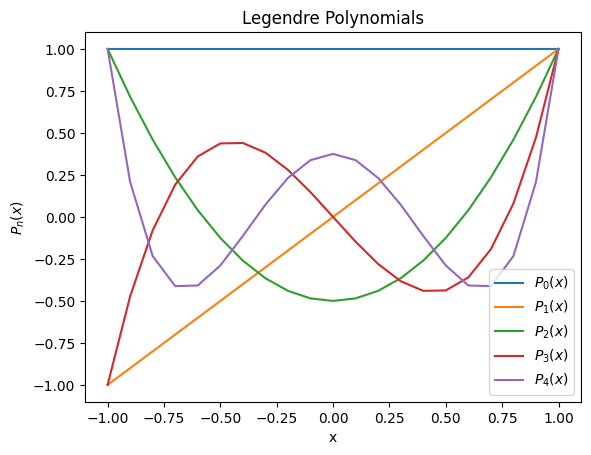

In [ ]:
n = 5
X = np.linspace(-1,1,21)
print(X)
for i in range(n):
    y = eval_legendre(i, X)
    print(y)
    plt.plot(X, y, label=r'$P_{}(x)$'.format(i))

plt.title("Legendre Polynomials")
plt.xlabel("x")
plt.ylabel(r'$P_n(x)$')
plt.legend(loc='lower right')
plt.show()

## Introducing the Gauss-Legendre quadrature

There is a very convenient and accurate way to calculate integrals using Legendre polynomials ... [Gauss-Legendre quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature)

[Numerical quadrature](https://en.wikipedia.org/wiki/Numerical_integration) approximates an integral of a function $f(x)$ over an interval (for now we pick $[-1,1]$) as a weighted sum of the function evaluated at some special points.
$$\int_{-1}^{1} f(x) dx = \sum_{i=1}^n \omega_i f(x_i) + O(\varepsilon)$$
* $\omega_i$ are numbers called the weights
* $x_i$ are numbers called the points or roots

There's a zillion different quadrature rules.  The cool thing about Gauss-Legendre quadrature is that if you use $n$ points you can *exactly* integrate polynomials of degree up to and including $2n-1$. 

Let's try it.  First calculate the points and weights for n as set above (it was 5) (look [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html) for documentation) and show that it can indeed integrate everything up to $x^{2n-1}$ but cannot integrate $x^{2n}$.  We'll do this by numerically calcuating
$$\int_{-1}^{1} (1+x)^i dx = \frac{2^{i+1}}{i+1}$$

In [ ]:
roots, weights = roots_legendre(n)
print(roots)
print(weights)
print(sum(weights))

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
2.0


In [ ]:
(roots+1)**2

array([0.00880222, 0.21301058, 1.        , 2.36688782, 3.63352161])

In [ ]:
print("%d point rule should be exact up to degree %d" % (n, 2*n-1))
x = roots # just to make the code a bit more readable
print(" n     approx     exact      error")
for i in range(2*n+1):
    approx= np.dot((x+1)**i,weights)
    exact = 2**(i+1) / (i+1)
    err = abs(exact - approx)
    print("%2d %10.6f %10.6f %10.2e" % (i, approx, exact, err))


5 point rule should be exact up to degree 9
 n     approx     exact      error
 0   2.000000   2.000000   0.00e+00
 1   2.000000   2.000000   0.00e+00
 2   2.666667   2.666667   4.44e-16
 3   4.000000   4.000000   8.88e-16
 4   6.400000   6.400000   2.66e-15
 5  10.666667  10.666667   5.33e-15
 6  18.285714  18.285714   1.07e-14
 7  32.000000  32.000000   2.49e-14
 8  56.888889  56.888889   4.26e-14
 9 102.400000 102.400000   9.95e-14
10 186.178886 186.181818   2.93e-03


This code
```
approx= np.dot((x+1)**i,weights)
```
to evaluate the integral is a bit opaque since it is using NumPy to make the calculation fast since NumPy can operate on an entire vector.  It is exactly the same as doing the following.

In [ ]:
def f(x):
    return (1+x)**i

i = 5
result = 0.0
for j in range(n):
    result = result + weights[j]*f(x[j])

approx= np.dot((x+1)**i,weights)
print(result, approx)

10.66666666666666 10.66666666666666


## Orthogonality of Legendre polynomials

Imagine if you have a product of two degree $n-1$ polynomials — this product is itself a polynomial of degree $2n-2$.  For instance, we can exactly calculate using $n$-order GL quadrature the integral of the product of two Legendre polynomials
$$\int_{-1}^{1} P_i(x) P_j(x) dx $$
where $i \leq n$ and $j \leq n$.  

This integral of the product of two Legendre polynomials always evaluates to $0$ unless $i=j$. 

Let's reproduce the "orthogonality relation" in Equation 23 [here](https://mathworld.wolfram.com/LegendrePolynomial.html)

In [ ]:
print(" i  j     approx     exact      error")
for i in range(n):
    Pi = eval_legendre(i, roots)
    for j in range(n):
        Pj = eval_legendre(j, roots)
        approx = np.dot(Pi*Pj,weights)
        if i == j:
            exact = 2/(2*i+1)
        else:
            exact = 0.0
        err = approx - exact
        print("%2d %2d %10.6f %10.6f %10.2e" % (i, j, approx, exact, err))

 i  j     approx     exact      error
 0  0   2.000000   2.000000   0.00e+00
 0  1  -0.000000   0.000000  -2.78e-17
 0  2  -0.000000   0.000000  -2.50e-16
 0  3  -0.000000   0.000000  -2.78e-17
 0  4  -0.000000   0.000000  -1.25e-16
 1  0  -0.000000   0.000000  -2.78e-17
 1  1   0.666667   0.666667  -1.11e-16
 1  2  -0.000000   0.000000  -2.78e-17
 1  3  -0.000000   0.000000  -1.80e-16
 1  4   0.000000   0.000000   5.55e-17
 2  0  -0.000000   0.000000  -2.50e-16
 2  1  -0.000000   0.000000  -2.78e-17
 2  2   0.400000   0.400000  -2.22e-16
 2  3   0.000000   0.000000   1.39e-16
 2  4  -0.000000   0.000000  -2.43e-16
 3  0  -0.000000   0.000000  -2.78e-17
 3  1  -0.000000   0.000000  -1.80e-16
 3  2   0.000000   0.000000   1.39e-16
 3  3   0.285714   0.285714  -1.67e-16
 3  4   0.000000   0.000000   1.18e-16
 4  0  -0.000000   0.000000  -1.25e-16
 4  1   0.000000   0.000000   5.55e-17
 4  2  -0.000000   0.000000  -2.43e-16
 4  3   0.000000   0.000000   1.18e-16
 4  4   0.222222   0.22222

## Expanding integration range with change of variables

Finally, we need to calculate integrals over a general range $[a,b]$. E.g., 
$$\int_a^b f(t) dt$$
so we need to do a change of variables to map this back onto the integral $[-1,1]$ that we can use with Gauss Legendre quadrature.  Defining,
$$t = \frac{b-a}{2} x + \frac{a + b}{2}$$
we have
$$\int_a^b f(t) dt = \frac{b-a}{2} \int_{-1}^1f(\frac{b-a}{2} x + \frac{a + b}{2}) dx$$
Hence, if we have the GL points $x_i$ and weights $\omega_i$ for $[-1,1]$ we can integratate over the integral $[a,b]$ using
$$\int_a^b f(t) dt \approx \sum_i u_i f(t_i)$$
with 
* $t_i = \frac{b-a}{2} x_i + \frac{a + b}{2}$, and
* $u_i = \frac{b-a}{2} \omega_i$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html

Let's do this integral
$$\int_2^3 \sin(t) dt = [\cos(t)]_2^3 = \cos(2)-\cos(3) \approx 0.5738456600533031$$

In [ ]:
n = 3
roots, weights = roots_legendre(n)
a = 2
b = 3
t = (b-a)/2 * roots + (a+b)/2
u = (b-a)/2 * weights
approx = np.dot(np.sin(t),u)
exact = math.cos(a)-math.cos(b)
print(approx,exact,exact-approx)

0.5738459546544643 0.5738456600533031 -2.946011612436905e-07


The numerical integral is not exact since $\sin(x)$ is not exactly approximated by a polynomial of degree $2n-1$. 
* But we can use a higher order quadrature to get more accuracy

[<matplotlib.lines.Line2D>]

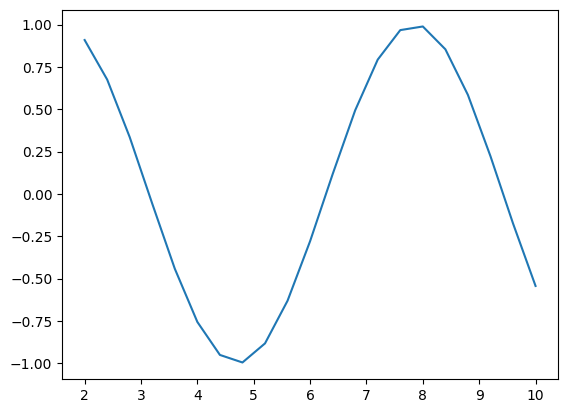

In [ ]:
X = np.linspace(2,10,21)
plt.plot(X,np.sin(X))

In [ ]:
a = 2
b = 10 # use a bigger range to make it harder
print(" n      approx             exact           error")
for n in range(1,12):
    roots, weights = roots_legendre(n)
    t = (b-a)/2 * roots + (a+b)/2
    u = (b-a)/2 * weights
    approx = np.dot(np.sin(t),u)
    exact = math.cos(a)-math.cos(b)
    err = approx-exact
    print("%2d %18.15f %18.15f %10.2e" % (n, approx, exact, err))

 n      approx             exact           error
 1 -2.235323985591407  0.422924692529310  -2.66e+00
 2  1.504947313471988  0.422924692529310   1.08e+00
 3  0.247210399427349  0.422924692529310  -1.76e-01
 4  0.437030697792959  0.422924692529310   1.41e-02
 5  0.422247256972586  0.422924692529310  -6.77e-04
 6  0.422946382889693  0.422924692529310   2.17e-05
 7  0.422924195802881  0.422924692529310  -4.97e-07
 8  0.422924701076322  0.422924692529310   8.55e-09
 9  0.422924692414705  0.422924692529310  -1.15e-10
10  0.422924692530540  0.422924692529310   1.23e-12
11  0.422924692529300  0.422924692529310  -9.83e-15


### Differentiating Legendre by recurrence identity

The derivative of a Legendre polyn can be computed from this recurrence
$$(2l+1) P_l(x) = \frac{d}{dx}\left( P_{l+1}(x) - P_{l-1}(x) \right)$$
Using prime to denote derivative, dropping the $(x)$ and then rearranging with $l\rightarrow l-1$
$$\begin{aligned}
(2l+1) P_l &= P'_{l+1} - P'_{l-1} \\
P'_{l+1} &= (2l+1) P_l + P'_{l-1} \\
P'_{l} &= (2l-1) P_{l-1} + P'_{l-2}
\end{aligned}$$
Remember also
$$
P_0(x) = 1 \ \ \implies \ \ P'_0 = 0 \\
P_1(x) = x \ \ \implies \ \ P'_1 = 1
$$
Let's test the formula comparing against a central derivative approximation

In [ ]:
# a routine to compute a derivative using central difference approximation
def diff1(f,x,h=1e-6):
    return (f(x+h)-f(x))/h

def diff(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

print(diff1(math.sin,0.1),diff(math.sin,0.1),math.cos(0.1))

0.9950041153644618 0.9950041652759256 0.9950041652780258


In [ ]:
# a routine to recursively calculate the derivative of a Legendre polyn using the recurrence
# Note, that this will be slow for large l --- why?  What is the complexity of the algorithm?
def diffP(l, x):
    if l == 0:
        return 0.0
    elif l == 1:
        return 1.0
    else:
        return (2*l-1)*eval_legendre(l-1,x) + diffP(l-2,x)
      

In [ ]:
xtest = 0.8
l = 7
drecur = diffP(l,xtest)
dnumer = diff(lambda x: eval_legendre(l,x), xtest)
print(drecur, dnumer)

-3.890347999999999 -3.890347999954691


In [ ]:
# Compute the derivatives of all Legendre polynomials [0,n) at the point x
# This is O(n) times faster than using the original algorithm since it only
# evaluates the polynomials once.
def diffP2(n,x):
    P = eval_legendre(range(n-1),x)
    dP = np.zeros(n)
    dP[0] = 0
    if n == 1:
        return
    dP[1] = 1
    for l in range(2,n):
        dP[l] = (2*l-1)*P[l-1] + dP[l-2]
    
    return dP

(note by Daniel: these `timeit`s are quite slow so I commented them out)

In [ ]:
# %timeit dd = [diffP(l,0.125) for l in range(20)]

In [ ]:
# %timeit d = diffP2(20,0.125)

In [ ]:
d = diffP2(6,0.125)
dd = [diffP(l,0.125) for l in range(6)]
print(d)
print(dd)

[ 0.          1.          0.375      -1.3828125  -0.90332031  1.47445679]
[0.0, 1.0, 0.375, -1.3828125, -0.9033203124999991, 1.474456787109375]


Notice that the new way is also more accurate though I cannot explain why!
* (note by Daniel: I think the accuracy is the same, less digits are displayed in `d` only because it is a numpy array, while `dd` is only a list)

Using the recursion one can derive that
$$P_n'(x) = (2n-1) P_{n-1}(x) + (2n-3) P_{n-3}(x) + \cdots$$
which we test below.  This form is also useful if we want to analytically compute integrals involving derivatives.

In [ ]:
def diffP3(n,x):
    P = eval_legendre(range(n+1),x)
    s = 0.0
    for l in range(n-1,-1,-2):
        s += (2*l+1)*P[l]
    return s

print(diffP(9,0.1),diffP3(9,0.1))

1.4471087027343752 1.4471087027343752


## Calculating KE with integration by parts

Now we need to calculate the kinetic energy integrals

$$t_{ij} = \int_{-1}^1 P_i(x) \frac{d^2 P_j}{dx^2} (x) dx$$

Stopping to think and to ask yourself what do we already know and what do we expect is always a good place to start
* We know that the second derivative of a polynomial of degree $n$ is a polynomial of degree $n-2$.
* We know that a polynomial of degree $n$ can be exactly expanded in terms of Legendre polynomials $P_l(x)$ for $l=0,\ldots,n$.
* We know that the second derivative of an even (meaning $p(x)=p(-x)$) polynomial is also even.
* We know that Legendre polynomials are orthogonal.  So if $p(x)$ is a polynomial of degree $j-2$, then $\int_{-1}^1 P_i(x) p(x) dx$ is zero unless $i \le j-2$.
* Thus, we already can infer the integral is zero unless
  * $i \le j-2$, and
  * $i$ and $j$ are noth both even or both odd
* Also note that the matrix will not be symmetric since $t_{ij} \ne t_{ji}$ unless $i=j$.

So far, we can only compute the first derivative (though we could get the second with a little more work).  More significantly, we cannot easily enforce boundary conditions in the above form.

We can use integration by parts
$$\int U dV = [UV] - \int V dU$$
with $U=P_i$ and $dV = \frac{d^2 P_j}{dx^2} dx$ to rearrange, obtaining
$$
t_{ij} = \left[P_i(x) \frac{dP_j}{dx} (x) \right]_{-1}^1 - \int_{-1}^1 \frac{dP_i}{dx}(x) \frac{dP_j}{dx} (x) dx \\
 = P_i(1)P_j'(1) - P_i(-1)P_j'(-1) - \int_{-1}^1 P_i'(x) P_j'(x) dx
 $$
in which we introduced $P_i'(x) = \frac{dP_i}{dx}(x)$.

Applying the same thinking as above, we can see that $\int_{-1}^1 P_i'(x) P_j'(x) dx$ is 
* zero unless $i$ and $j$ are either both even or both odd
* symmetric in exchanging $i$ and $j$.

We also have 
$$P_i(1) = 1\ \ \forall i$$
and 
$$P_i(-1) = (-1)^i$$
(i.e., even $i$ is +1 and odd $i$ is -1).

Finally, a little bit of Googling or knowing the right text book will find
$$\frac{dP_i}{dx} (1) = \frac{i(i+1)}{2}$$ 
and
$$\frac{dP_i}{dx} (-1) = (-1)^{i+1}\frac{i(i+1)}{2}$$ 

Finally, if we want to avoid numerical computation of these integrals we can use the formula above for $P_n'(x)$ to compute
$$
\int_{-1}^1 P_i'(x) P_j'(x) dx = l (l+1) \quad \text{with}\ l=\min(i,j)
$$
for $i,j$ both even or both odd.

However, since we need to compute other types of integrals and we want to use other basis functions we won't use this knowledge except to check our answers.

Problem:
* Use GL quadrature to evaluate $\int_{-1}^1 P_i'(x) P_j'(x) dx$ for $i,j=0,1,\ldots,6$ and test against the known value.
* What order quadrature do you need to compute accurately?

**(Following is my solution for this part – Daniel)**

In [ ]:
n = 6 # i,j = 0,1,2,…,n

order = 7 # P' degree 5, P'*P' degree 10, by the 2n-1 rule we will need order 6

roots, weights = roots_legendre(order)

Px = np.array([eval_legendre(i, roots) for i in range(n+1)])
dPx = np.zeros((n+1, order))
dPx[1] = np.ones(order)

for i in range(2,n+1):
    dPx[i] = (2*i-1) * Px[i-1] + dPx[i-2]

print(dPx)

[[  0.           0.           0.           0.           0.
    0.           0.        ]
 [  1.           1.           1.           1.           1.
    1.           1.        ]
 [ -2.84732374  -2.22459356  -1.21753545   0.           1.21753545
    2.22459356   2.84732374]
 [  5.25604372   2.62401374  -0.26467285  -1.5         -0.26467285
    2.62401374   5.25604372]
 [ -7.84352461  -1.57404731   1.87401839   0.          -1.87401839
    1.57404731   7.84352461]
 [ 10.1797357   -0.65380555  -1.38042181   1.875       -1.38042181
   -0.65380555  10.1797357 ]
 [-11.84343941   2.95545462  -1.01629957   0.           1.01629957
   -2.95545462  11.84343941]]


In [ ]:
s = np.zeros((n+1, n+1))

for i in range(n+1):
    for j in range(n+1):
        #print(dPx[i] * dPx[j])
        s[i, j] = np.dot(dPx[i] * dPx[j], weights)

print(np.array_str(s, precision=3, suppress_small=True))

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  2. -0.  2. -0.]
 [ 0.  0.  6.  0.  6. -0.  6.]
 [ 0.  2.  0. 12. -0. 12. -0.]
 [ 0. -0.  6. -0. 20. -0. 20.]
 [ 0.  2. -0. 12. -0. 30. -0.]
 [ 0. -0.  6. -0. 20. -0. 42.]]


In [ ]:
s_exact = np.zeros((n+1, n+1))

for i in range(n+1):
    for j in range(n+1):
        if i % 2 == j % 2:
            l = min(i,j)
            s_exact[i,j] = l*(l+1)

error = s_exact - s

print(np.array_str(error, precision=2))

[[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  2.22e-16  0.00e+00 -2.66e-15  2.22e-16 -4.00e-15  2.89e-15]
 [ 0.00e+00  0.00e+00 -3.55e-15  0.00e+00 -8.88e-15  3.55e-15 -7.99e-15]
 [ 0.00e+00 -2.66e-15  0.00e+00 -1.07e-14  1.78e-15 -1.42e-14  1.42e-14]
 [ 0.00e+00  2.22e-16 -8.88e-15  1.78e-15 -1.78e-14  1.42e-14 -1.78e-14]
 [ 0.00e+00 -4.00e-15  3.55e-15 -1.42e-14  1.42e-14 -1.42e-14  4.44e-14]
 [ 0.00e+00  2.89e-15 -7.99e-15  1.42e-14 -1.78e-14  4.44e-14 -7.11e-15]]


## Boundary conditions in the harmonic oscillator

A quick detour into boundary conditions.  You'll see why in a little bit.

Consider a simple first-order differential equation
$$
   \frac{df}{dx}(x) = p(x)
$$
We can easily integrate to obtain
$$
   f(x) = \int p(x) dx + C
$$
where $C$ is the constant of integration.  How to determine $C$?  
* We provide a boundary condition that at $x=x_0$ specifies the value of $f(x_0)$.

For a second-order equation we are going to have two constants of integration, which we determine by providing two boundary conditions that can be either the value or the derivative of the solution.

### Classical harmonic oscillator
The equation for the classical harmonic oscillator starts with Newton's second law ($F = m a$).  The energy of a spring with force constant $k$ stretched from its equilibrium point by $x$ is
$$
   V(x) = \frac{1}{2} k x^2
$$
and hence the force is
$$
  F(x) = -\frac{dV}{dx}(x) = - k x
$$
Thus, using the definition of the acceleration ($a$) the equation becomes
$$
  m \frac{d^2 x}{dt^2}(t) = - k x (t)
$$
This can be integrated to yield
$$
  x(t) = A \sin(\omega t) + B \cos(\omega t)
$$
where $\omega = \sqrt{k/m}$ is the angular frequency and $A$ and $B$ are constants of integration.
* Verify this by substitution if you have not done this before.

Specifying two boundary conditions
* $x(0) = 0$ (i.e, the particle is at the origin at time zero) implies $B=0$
* The amplitude of vibration is $X$ (when $t=\pi/2, 3\pi/2, \ldots $) implies $A = X$
and the solution becomes
$$
  x(t) = X \sin(\omega t)
$$

### Quantum harmonic oscillator
In the quantum mechanics formulation of the harmonic oscillator, we know that the particle is localized near the equilibrium position --- there is zero probability of it going to infininity since it would take an infinite energy to stretch the spring.  Thus, we demand that our wave function goes to zero at long range.  I.e., if $\psi(x)$ is our wave function
$$\psi(\pm \infty) = 0 $$
Since we are computing in the finite box $[-L,L]$ we in practice use
$$\psi(\pm L) = 0 $$

What does this mean for our basis set selection and also the kinetic energy integrals?
Our quantum mechanical energy $E$ is computed via
$$
  E \int \psi(x)  \psi(x) dx = \int \psi(x) \hat{H} \psi(x) dx
$$
where our Hamiltonian is 
$$
  \hat{H} = -\frac{1}{2} \frac{d^2}{dx^2} + V(x)
$$
Focusing on the kinetic energy piece we can again integrate by parts to obtain
$$
  E_{\textrm{kinetic}} \int \psi(x) \psi(x) dx = -\frac{1}{2} \int \psi(x) \frac{d^2}{dx^2} \psi(x) dx \\
  = \left[\psi(x) \frac{d\psi}{dx}(x)\right] _{-L}^{L} + \frac{1}{2} \int \frac{d\psi}{dx}(x) \frac{d\psi}{dx}(x) dx \\
  = \frac{1}{2} \int \frac{d\psi}{dx}(x) \frac{d\psi}{dx}(x) dx
$$
where the last line follows from applying the boundary conditions of zero. 



## Expressing in energy in finite basis functions

We are expanding $\psi$ in terms of the basis functions $b_l(x) = P_l(x/L)$
$$
\psi(x) = \sum_{l=0}^{n-1} b_l(x) c_l
$$
where the simulation box is $\pm L$.  Substituting this into the energy expression we obtain.

$$
  E \sum_{lm} \left\langle l \middle| m \right\rangle c_l c_m = \sum_{lm} \left\langle l \middle| -\frac{1}{2} \frac{d^2}{dx^2} \middle| m \right\rangle c_l c_m + \sum_{lm} \left\langle l \middle| \frac{1}{2} \omega x^2 \middle| m \right\rangle c_l c_m \\
 = \frac{1}{2} \sum_{lm} \left\langle \frac{db_l}{dx}  \middle| \frac{db_m}{dx} \right\rangle c_l c_m + \sum_{lm} \left\langle l \middle| \frac{1}{2} \omega x^2 \middle| m \right\rangle c_l c_m
$$
Cleaning this up ($h$ is the Hamiltonian matrix for energy, $s$ is the overlap matrix)
$$
 \sum_{lm} c_l (h_{lm} - E s_{lm}) c_m = 0
 $$

To find the lowest energy state, minimize w.r.t. $c$. To do this, differentiate w.r.t $c_l$
$$
  \frac{dE}{dc_l} = \frac{2}{Q} \sum_{m} (h_{lm} - E s_{lm}) c_m
$$
where $Q$ is the square of the norm of the wave function ($\Vert \psi \Vert^2$)
$$
Q=\sum_{m m'} c_m s_{m m'} c_{m'}
$$
We will want to solve
$$
  \frac{dE}{dc_l} = 0
$$
to find the minimimum.

### Code for the overlap matrix $s$

In [ ]:
# This sets up the quadrature
n = 7 # order
roots, weights = roots_legendre(n)
epsilon = 1e-13 # threshold for error

# Reuseable matrix of Legendre polynomials
# P[i,j] = P_i(x_j), where x_j is the j-th root of P_n
P = np.array([eval_legendre(i, roots) for i in range(n+1)])

# Reuseable matrix of P'
# generated by recurrence identity
dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

In [ ]:
# Calculates matrix s

int_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx = np.dot(P[i]*P[j], weights)
        if abs(approx) < epsilon:
            approx = 0
        int_matrix[i,j] = approx
print(int_matrix)

[[2.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.66666667 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.4        0.         0.         0.
  0.        ]
 [0.         0.         0.         0.28571429 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.22222222 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.18181818
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.15384615]]


### Code for the energy matrix $h$

In [ ]:
# Calculates the KE term for h
# Note this includes the 1/2 in the front!

ke_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx_ke = np.dot(dP[i]*dP[j], weights) / 2
        if abs(approx_ke) < epsilon:
            approx_ke = 0
        ke_matrix[i,j] = approx_ke
print(ke_matrix)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  3.  0.  3.  0.  3.]
 [ 0.  1.  0.  6.  0.  6.  0.]
 [ 0.  0.  3.  0. 10.  0. 10.]
 [ 0.  1.  0.  6.  0. 15.  0.]
 [ 0.  0.  3.  0. 10.  0. 21.]]


In [ ]:
# Calculates the PE term for h

omega = 2.0
pe_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        approx_pe = np.dot(P[i] * P[j] * 0.5 * omega**2 * roots**2, weights)
        if abs(approx_pe) < epsilon:
            approx_pe = 0
        pe_matrix[i,j] = approx_pe
print (pe_matrix)

[[1.33333333 0.         0.53333333 0.         0.         0.
  0.        ]
 [0.         0.8        0.         0.22857143 0.         0.
  0.        ]
 [0.53333333 0.         0.41904762 0.         0.15238095 0.
  0.        ]
 [0.         0.22857143 0.         0.29206349 0.         0.11544012
  0.        ]
 [0.         0.         0.15238095 0.         0.22510823 0.
  0.09324009]
 [0.         0.         0.         0.11544012 0.         0.18337218
  0.        ]
 [0.         0.         0.         0.         0.09324009 0.
  0.077461  ]]


### Expanding intergration range for energy calculation

For the integrals, it is easiest to evaluate them over $[-1,1]$.  So do a change of variables $x = Ly$, so $dx = L dy$.  For the derivative use the chain rule
$$
   \frac{d}{dx} f(x) = \frac{dy}{dx} \frac{d}{dy} f(L y) = \frac{1}{L} \frac{d}{dy} f(L y)
$$
Since $b_l(x) = P_l(x/L)$ we have $b_l(L y) = P_l(y)$. 

The kinetic energy integral becomes
$$
\left\langle \frac{db_l}{dx}  \middle| \frac{db_m}{dx} \right\rangle = \int_{-L}^L\frac{db_l}{dx} \frac{db_m}{dx}  dx 
= \frac{1}{L} \int_{-1}^1 P_l^\prime(y) P_m^\prime(y) dy
$$
and the potential energy integral
$$
\left\langle l  \middle| \frac{1}{2} \omega^2 x^2 \middle| m \right\rangle = \int_{-L}^L b_l(x) \frac{1}{2} \omega^2 x^2  b_m(x)  dx \
= \frac{1}{2} \omega^2 L^3 \int_{-1}^1 P_l(y)  y^2  P_m(y)  dy
$$

## Projecting a function into the Legendre basis

It's also useful to be able to project a general function into the Legendre polynomial basis, i.e., given a function $f(x)$ defined in the interval $[-L,L]$ compute an approximation of the form
$$
f(x) \approx \sum_{l=0}^{n-1} f_l P_l(x/L)
$$
Multiplying from the left by $P_m(x)$, integrating, using the orthogonality of Legendre polynomials and the known value of the integral of a square of the polynomial
$$
f_l = \frac{2l+1}{2} \int_{-1}^{1} f(L y) P_l(y) dy
$$

Let's try this to approximate $f(x) = \sin(x)$ over $[-8,8]$

In [ ]:
L = 8.0
f = np.zeros(n)
for l in range(n):
    Pl = eval_legendre(l,roots)
    f[l] = ((2*l+1)/2)*np.dot(np.sin(L*roots)*Pl,weights)
print(f)
fit = lambda x : np.dot(eval_legendre(range(n),x/L),f)
fit(0.1),math.sin(0.1)

[ 0.00000000e+00  9.34774798e-02 -6.93889390e-17  8.11474452e-01
 -4.99600361e-16  8.20060486e-01 -1.17267307e-15]


(0.005163439694595497, 0.09983341664682815)

[<matplotlib.lines.Line2D>,
 <matplotlib.lines.Line2D>]

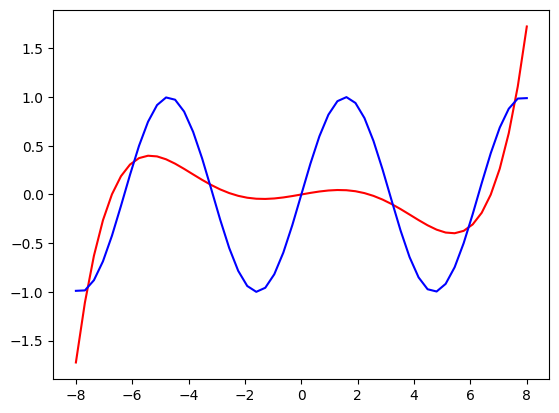

In [ ]:
X = np.linspace(-L,L,51)
F = [fit(x) for x in X]
plt.plot(X,F,"r",X,np.sin(X),"b")

## Verifiying the coefficients in the numerical code

In preparation for debugging the numerical code, verify by substitution into 
$$
-\frac{1}{2} \frac{d^2}{dx^2} \psi(x) + \frac{1}{2} \omega^2 x^2 \psi(x) = E \psi(x)
$$
that the exact solution is
$$
\psi(x) = e^{-\frac{\omega x^2}{2}}
$$
with eigenvalue 
$$E = \frac{\omega}{2}$$

We will use $\omega=2$ and $L=8$ (chosen so that $\psi(\pm L)$ is very small).

The overlap integral is
$$\left\langle \psi \middle| \psi \right\rangle = \sqrt{\frac{\pi}{\omega}}$$

Using the projection method we just tested on $\sin(x)$ compute a polynomial approximation to $\psi(x)$ and verify it by computing the error at a few points and by plotting both functions (the fit and the original function).


Now you can use the polynomial coefficients ($c$) used to fit $\psi$ and your numerically computed matrix elements to compute
* The overlap integral $\left\langle \psi \middle| \psi \right\rangle = \sum_{lm} c_l s_{lm} c_l$
* Compare with the exact answer from above
* The energy integral $\left\langle \psi \middle| \hat{H} \middle| \psi \right\rangle = \sum_{lm} c_l h_{lm} c_l$
* And hence the energy $E=\left\langle \psi \middle| \hat{H} \middle| \psi \right\rangle / \left\langle \psi \middle| \psi \right\rangle$
* Compare again with the exact answer from above

If you get to here, you now know that your matrices are all correct.  Good job!

Now we get to actually do try to minimize the energy.


## Minimizing functions using SciPy

But first another detour into using the [SciPy minimzation routine](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

Let's minimize the function $f(c) = \sum_{i=0}^3 (c_i-i)^2$ where $c$ is a 4-dimensional vector.  The derivative is easily computed as
$$\frac{df}{dc_i} = 2(c_i-i)$$
and the minimum is at $c_i = i$ at which the function is zero.

We need to define functions to compute the energy and gradient as a function of $c$

In [ ]:
def energy(c):
    i = np.arange(c.shape[0])
    return np.sum((c-i)**2)

def gradient(c):
    i = np.arange(c.shape[0])
    return 2*(c-i)


c = np.random.random(4)
c, energy(c), gradient(c)

(array([0.58881117, 0.0243826 , 0.78469713, 0.99940676]),
 6.777862281311847,
 array([ 1.17762234, -1.95123481, -2.43060573, -4.00118648]))

Starting from a random initial guess  we minimize using the Conjugate Gradient (CG) method.

In [ ]:
c0 = np.random.random(4)
result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 7.741930227645586e-29
       x: [-2.109e-15  1.000e+00  2.000e+00  3.000e+00]
     nit: 1
     jac: [-4.219e-15  0.000e+00  7.994e-15  1.510e-14]
    nfev: 3
    njev: 3


## Minimizing the energy of the system

OK ... now minimize your harmonic oscillator energy function.